In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
pd.set_option('display.max_columns', None) # Show all columns

In [3]:
# Downloading the Adjusted Close Prices of Nifty Commodities Index Stocks
raw = pd.read_csv('niftycomm.csv')
tickers = [ticker + '.NS' for ticker in raw['Symbol'].tolist()]
end_date = pd.to_datetime('2024-05-15')
start_date = end_date - pd.DateOffset(years=3)
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  30 of 30 completed


In [4]:
df = df.drop(columns = ['ADANIENSOL.NS']) # Dropping ADANIENSOL.NS as it has very few data points
df = df.ffill() # Filling missing values with the previous day's value

In [5]:
#df.to_csv('niftycomm_adj_close_prices.csv')

In [6]:
# Calculating lognormal daily returns for all the stocks
daily_returns = np.log(df/df.shift(1)).dropna() # Dropping the first row as it will have NaN value
tickers = daily_returns.columns # Updating the tickers list as we have dropped ADANIENSOL.NS
daily_returns.to_csv('niftycomm_daily_returns.csv')
daily_returns.head()

,ACC.NS,ADANIGREEN.NS,ADANIPOWER.NS,AMBUJACEM.NS,APLAPOLLO.NS,BPCL.NS,COALINDIA.NS,DALBHARAT.NS,DEEPAKNTR.NS,GRASIM.NS,HINDALCO.NS,HINDPETRO.NS,IOC.NS,JINDALSTEL.NS,JSWSTEEL.NS,NTPC.NS,ONGC.NS,PIDILITIND.NS,PIIND.NS,RELIANCE.NS,SAIL.NS,SHREECEM.NS,SRF.NS,TATACHEM.NS,TATAPOWER.NS,TATASTEEL.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-18,0.018915,0.048104,0.048766,0.017417,-0.000279,0.010761,-0.011541,0.021507,0.043076,-0.001041,0.023018,0.050896,0.034212,0.008915,0.004260,0.004918,0.016063,0.001083,0.015105,0.013981,0.010667,0.005345,0.009489,0.014104,0.018200,0.025014,0.018301,-0.001753,0.024286
2021-05-19,-0.006568,0.036771,0.004895,0.006316,0.026226,-0.004470,0.036209,-0.011990,-0.010589,-0.001941,0.002980,0.028826,0.015512,-0.040760,-0.016301,-0.001339,-0.010390,0.014578,-0.064093,0.004567,-0.025716,0.002109,-0.002087,-0.002314,-0.010496,-0.013437,-0.013894,0.016436,-0.009856
2021-05-20,0.015906,0.020060,-0.022717,0.007371,-0.016947,0.018530,-0.034844,0.010971,-0.000676,-0.010452,-0.045918,-0.023557,-0.023597,-0.050564,-0.016211,-0.001788,-0.027351,0.007830,0.005913,-0.005851,-0.057204,-0.000812,0.003572,-0.007680,-0.012548,-0.052187,0.001926,-0.018908,-0.024710
2021-05-21,0.003619,0.023638,0.009940,0.004521,-0.010874,0.013649,0.003743,0.008942,-0.006815,-0.002475,0.011871,0.036488,-0.003828,0.005223,0.005314,0.009795,0.008461,0.021436,-0.008191,0.008601,0.004518,0.004074,0.002312,0.001272,0.018764,0.007258,0.009651,0.015963,-0.007826
2021-05-24,0.009722,0.046434,-0.000495,0.014669,0.000199,0.025272,0.011483,0.025639,0.014087,-0.000802,-0.001283,0.029422,0.048196,-0.013234,-0.024283,0.000443,0.002657,0.040571,-0.006315,-0.008475,0.022291,-0.026162,-0.006570,-0.000848,0.022621,-0.019138,-0.011394,0.012108,0.004739


In [7]:
# Creating the covariance matrix
cov_mat = daily_returns.cov()
cov_mat.to_csv('niftycomm_cov_matrix.csv')
cov_mat

,ACC.NS,ADANIGREEN.NS,ADANIPOWER.NS,AMBUJACEM.NS,APLAPOLLO.NS,BPCL.NS,COALINDIA.NS,DALBHARAT.NS,DEEPAKNTR.NS,GRASIM.NS,HINDALCO.NS,HINDPETRO.NS,IOC.NS,JINDALSTEL.NS,JSWSTEEL.NS,NTPC.NS,ONGC.NS,PIDILITIND.NS,PIIND.NS,RELIANCE.NS,SAIL.NS,SHREECEM.NS,SRF.NS,TATACHEM.NS,TATAPOWER.NS,TATASTEEL.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS
ACC.NS,0.000348,0.000203,0.000221,0.000339,0.000078,0.000097,0.000076,0.000184,0.000114,0.000133,0.000120,0.000112,0.000093,0.000161,0.000109,0.000087,0.000041,0.000067,0.000082,0.000076,0.000178,0.000133,0.000113,0.000120,0.000147,0.000126,0.000130,0.000095,0.000122
ADANIGREEN.NS,0.000203,0.001137,0.000533,0.000269,0.000058,0.000119,0.000104,0.000131,0.000097,0.000105,0.000142,0.000168,0.000122,0.000153,0.000139,0.000086,0.000114,0.000053,0.000081,0.000088,0.000199,0.000081,0.000107,0.000139,0.000173,0.000153,0.000065,0.000102,0.000162
ADANIPOWER.NS,0.000221,0.000533,0.001172,0.000237,0.000129,0.000120,0.000160,0.000172,0.000172,0.000132,0.000176,0.000140,0.000127,0.000221,0.000152,0.000164,0.000113,0.000071,0.000146,0.000108,0.000242,0.000128,0.000175,0.000195,0.000304,0.000174,0.000099,0.000132,0.000216
AMBUJACEM.NS,0.000339,0.000269,0.000237,0.000498,0.000077,0.000102,0.000080,0.000203,0.000120,0.000139,0.000108,0.000122,0.000109,0.000141,0.000107,0.000094,0.000045,0.000070,0.000086,0.000083,0.000177,0.000148,0.000110,0.000136,0.000166,0.000119,0.000141,0.000098,0.000140
APLAPOLLO.NS,0.000078,0.000058,0.000129,0.000077,0.000544,0.000071,0.000068,0.000102,0.000153,0.000071,0.000116,0.000086,0.000075,0.000156,0.000102,0.000055,0.000050,0.000069,0.000086,0.000068,0.000167,0.000068,0.000096,0.000106,0.000123,0.000133,0.000059,0.000078,0.000095
BPCL.NS,0.000097,0.000119,0.000120,0.000102,0.000071,0.000286,0.000120,0.000087,0.000105,0.000089,0.000089,0.000286,0.000213,0.000114,0.000091,0.000096,0.000099,0.000049,0.000079,0.000077,0.000180,0.000064,0.000081,0.000103,0.000137,0.000106,0.000069,0.000082,0.000105
COALINDIA.NS,0.000076,0.000104,0.000160,0.000080,0.000068,0.000120,0.000363,0.000080,0.000113,0.000082,0.000180,0.000138,0.000145,0.000194,0.000150,0.000147,0.000177,0.000029,0.000077,0.000098,0.000241,0.000060,0.000107,0.000152,0.000198,0.000194,0.000039,0.000116,0.000210
DALBHARAT.NS,0.000184,0.000131,0.000172,0.000203,0.000102,0.000087,0.000080,0.000412,0.000167,0.000152,0.000136,0.000089,0.000088,0.000184,0.000126,0.000078,0.000037,0.000092,0.000121,0.000072,0.000186,0.000144,0.000141,0.000136,0.000144,0.000151,0.000156,0.000122,0.000147
DEEPAKNTR.NS,0.000114,0.000097,0.000172,0.000120,0.000153,0.000105,0.000113,0.000167,0.000446,0.000109,0.000130,0.000106,0.000100,0.000182,0.000124,0.000089,0.000077,0.000100,0.000161,0.000091,0.000206,0.000083,0.000218,0.000223,0.000173,0.000154,0.000096,0.000143,0.000160
GRASIM.NS,0.000133,0.000105,0.000132,0.000139,0.000071,0.000089,0.000082,0.000152,0.000109,0.000225,0.000132,0.000093,0.000080,0.000150,0.000133,0.000073,0.000051,0.000073,0.000089,0.000077,0.000156,0.000113,0.000110,0.000117,0.000123,0.000129,0.000129,0.000090,0.000112


In [8]:
# Creating the correlation matrix
corr_mat = daily_returns.corr()
corr_mat.to_csv('niftycomm_corr_matrix.csv')
corr_mat

,ACC.NS,ADANIGREEN.NS,ADANIPOWER.NS,AMBUJACEM.NS,APLAPOLLO.NS,BPCL.NS,COALINDIA.NS,DALBHARAT.NS,DEEPAKNTR.NS,GRASIM.NS,HINDALCO.NS,HINDPETRO.NS,IOC.NS,JINDALSTEL.NS,JSWSTEEL.NS,NTPC.NS,ONGC.NS,PIDILITIND.NS,PIIND.NS,RELIANCE.NS,SAIL.NS,SHREECEM.NS,SRF.NS,TATACHEM.NS,TATAPOWER.NS,TATASTEEL.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS
ACC.NS,1.000000,0.322710,0.346571,0.814959,0.178817,0.307274,0.214256,0.486400,0.289025,0.474480,0.290602,0.271262,0.294363,0.354026,0.310065,0.297533,0.112689,0.257787,0.235025,0.284074,0.384507,0.433939,0.329695,0.302946,0.348726,0.325788,0.494381,0.297872,0.263618
ADANIGREEN.NS,0.322710,1.000000,0.461821,0.357596,0.073582,0.207997,0.162546,0.191187,0.136494,0.206979,0.190176,0.225900,0.214101,0.186632,0.218839,0.163000,0.170983,0.112498,0.129537,0.182388,0.237214,0.147508,0.172966,0.193229,0.226435,0.217847,0.137318,0.175339,0.192927
ADANIPOWER.NS,0.346571,0.461821,1.000000,0.310933,0.162188,0.208172,0.244638,0.247719,0.237419,0.256395,0.230956,0.184701,0.219927,0.265267,0.234570,0.306903,0.168024,0.148788,0.229136,0.218955,0.285183,0.227845,0.276849,0.267643,0.392475,0.245144,0.204779,0.223745,0.253684
AMBUJACEM.NS,0.814959,0.357596,0.310933,1.000000,0.147419,0.270646,0.187955,0.447862,0.255647,0.415559,0.217713,0.248142,0.289327,0.258914,0.254635,0.268796,0.102393,0.225884,0.205938,0.259021,0.320211,0.405276,0.266635,0.286668,0.329302,0.255932,0.449058,0.256687,0.252111
APLAPOLLO.NS,0.178817,0.073582,0.162188,0.147419,1.000000,0.180827,0.152716,0.214882,0.310603,0.204347,0.223601,0.166413,0.190944,0.275406,0.232466,0.150302,0.109298,0.211095,0.196966,0.201527,0.289251,0.177601,0.223889,0.214307,0.233874,0.275408,0.180213,0.193545,0.164358
BPCL.NS,0.307274,0.207997,0.208172,0.270646,0.180827,1.000000,0.371152,0.253093,0.293550,0.349167,0.236920,0.764099,0.743911,0.275866,0.285199,0.364610,0.297477,0.206118,0.250145,0.315625,0.427796,0.230937,0.260764,0.286525,0.357950,0.301862,0.290852,0.280923,0.250367
COALINDIA.NS,0.214256,0.162546,0.244638,0.187955,0.152716,0.371152,1.000000,0.207325,0.280556,0.287342,0.424660,0.327899,0.448663,0.417820,0.416895,0.492330,0.470104,0.108315,0.216426,0.356477,0.509980,0.191271,0.304119,0.374870,0.459154,0.488942,0.145401,0.353676,0.442642
DALBHARAT.NS,0.486400,0.191187,0.247719,0.447862,0.214882,0.253093,0.207325,1.000000,0.389190,0.500435,0.302646,0.197435,0.255890,0.371079,0.328705,0.246805,0.091343,0.324172,0.319646,0.246977,0.369617,0.433069,0.378452,0.315466,0.312772,0.357417,0.545030,0.348614,0.291655
DEEPAKNTR.NS,0.289025,0.136494,0.237419,0.255647,0.310603,0.293550,0.280556,0.389190,1.000000,0.342849,0.277438,0.227161,0.280586,0.354309,0.310960,0.270542,0.184568,0.338613,0.408307,0.300467,0.392529,0.238406,0.559239,0.496235,0.361499,0.350907,0.321854,0.395196,0.305512
GRASIM.NS,0.474480,0.206979,0.256395,0.415559,0.204347,0.349167,0.287342,0.500435,0.342849,1.000000,0.397830,0.281496,0.313873,0.409894,0.468743,0.312309,0.172671,0.348199,0.317132,0.356830,0.418698,0.459635,0.398846,0.367891,0.364040,0.413169,0.609254,0.347491,0.300797


In [9]:
def expected_return(weights, daily_returns): # Function to calculate the returns
    return np.sum(daily_returns.mean() * weights) * 252 # Annualizing the returns (252 trading days in a year)

def neg_return(weights, daily_returns): # Function to calculate the negative returns
    return -expected_return(weights, daily_returns)

def expected_volatility(weights, cov_matrix): # Function to calculate the volatility
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252) # Annualizing the volatility

def neg_sharpe(weights, cov_matrix, daily_returns, risk_free_rate): # Function to calculate the negative Sharpe ratio
    return -((expected_return(weights, daily_returns) - risk_free_rate) / expected_volatility(weights, cov_matrix))

In [10]:
risk_free_rate = 0.0425 # Risk-free rate taken from average long term US treasury bond yield, usually considered risk-free

In [11]:
# Getting the Original Portfolio Weights
og_weights = raw['Weightage'].tolist()
og_weights.pop(1)
og_weights = np.array(og_weights)
og_weights

array([0.0075, 0.0462, 0.0395, 0.0197, 0.0071, 0.0214, 0.0451, 0.0054,
       0.0055, 0.0258, 0.0237, 0.0114, 0.0367, 0.0163, 0.0351, 0.0562,
       0.056 , 0.0247, 0.0091, 0.3132, 0.0111, 0.0153, 0.011 , 0.0044,
       0.0224, 0.0336, 0.0455, 0.0062, 0.0447])

In [12]:
# Analysing the Original Portfolio
print("\nOriginal Portfolio Analysis\n")
exp_return = expected_return(og_weights, daily_returns)
exp_volatility = expected_volatility(og_weights, cov_mat)
sharpe_ratio = (exp_return - risk_free_rate) / exp_volatility
print(f"Expected Return: {exp_return:.2%}")
print(f"Expected Variance: {exp_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Original Portfolio Analysis

Expected Return: 23.93%
Expected Variance: 18.01%
Sharpe Ratio: 1.09


In [13]:
initial_weights = np.array([1/len(tickers)] * len(tickers)) # Initial weights for the optimization
bounds = [(0, 1)] * len(tickers) # Bounds for the weights, 0 implies no shorting allowed
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}) # Constraints for the weights, that they should sum to 1

In [14]:
min_var = minimize(expected_volatility, initial_weights, args=(cov_mat), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe = minimize(neg_sharpe, initial_weights, args=(cov_mat, daily_returns, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

In [30]:
print("\nMinimum Variance Portfolio Analysis\n")
mv_returns = expected_return(min_var.x, daily_returns)
mv_volatility = expected_volatility(min_var.x, cov_mat)
mv_sharpe_ratio = (mv_returns - risk_free_rate) / mv_volatility
print(f"Expected Return: {mv_returns}")
print(f"Expected Variance: {mv_volatility}")
print(f"Sharpe Ratio: {mv_sharpe_ratio:.2f}")


Minimum Variance Portfolio Analysis

Expected Return: 0.18894338645858078
Expected Variance: 0.1437491821492164
Sharpe Ratio: 1.02


In [29]:
print("\nMaximum Sharpe Ratio Portfolio Analysis\n")
ms_returns = expected_return(max_sharpe.x, daily_returns)
ms_volatility = expected_volatility(max_sharpe.x, cov_mat)
ms_sharpe_ratio = (ms_returns - risk_free_rate) / ms_volatility
print(f"Expected Return: {ms_returns}")
print(f"Expected Variance: {ms_volatility}")
print(f"Sharpe Ratio: {ms_sharpe_ratio:.2f}")


Maximum Sharpe Ratio Portfolio Analysis

Expected Return: 0.4314230451781096
Expected Variance: 0.203539669060612
Sharpe Ratio: 1.91


In [24]:
# Creating the efficient frontier
ef_returns = np.linspace(0, 0.6, 6000)
ef_volatility = []
ef_sharpe = []
iteration = 0
for ret in ef_returns:
    iteration += 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: expected_return(weights, daily_returns) - ret})
    result = minimize(expected_volatility, initial_weights, args=(cov_mat), method='SLSQP', bounds=bounds, constraints=constraints)
    ef_volatility.append(expected_volatility(result.x, cov_mat))
    ef_sharpe.append(-neg_sharpe(result.x, cov_mat, daily_returns, risk_free_rate))
    print(f"Iteration: {iteration}/6000 finished...")

Iteration: 1/6000 finished...
Iteration: 2/6000 finished...
Iteration: 3/6000 finished...
Iteration: 4/6000 finished...
Iteration: 5/6000 finished...
Iteration: 6/6000 finished...
Iteration: 7/6000 finished...
Iteration: 8/6000 finished...
Iteration: 9/6000 finished...
Iteration: 10/6000 finished...
Iteration: 11/6000 finished...
Iteration: 12/6000 finished...
Iteration: 13/6000 finished...
Iteration: 14/6000 finished...
Iteration: 15/6000 finished...
Iteration: 16/6000 finished...
Iteration: 17/6000 finished...
Iteration: 18/6000 finished...
Iteration: 19/6000 finished...
Iteration: 20/6000 finished...
Iteration: 21/6000 finished...
Iteration: 22/6000 finished...
Iteration: 23/6000 finished...
Iteration: 24/6000 finished...
Iteration: 25/6000 finished...
Iteration: 26/6000 finished...
Iteration: 27/6000 finished...
Iteration: 28/6000 finished...
Iteration: 29/6000 finished...
Iteration: 30/6000 finished...
Iteration: 31/6000 finished...
Iteration: 32/6000 finished...
Iteration: 33/600

In [43]:
# Creating the Capital Market Line that is tangential to the Efficient Frontier at the Optimal Portfolio
cml_x = np.linspace(0.1, 0.3, 3000)
cml_y = [risk_free_rate + (ms_returns - risk_free_rate) / ms_volatility * vol for vol in cml_x]

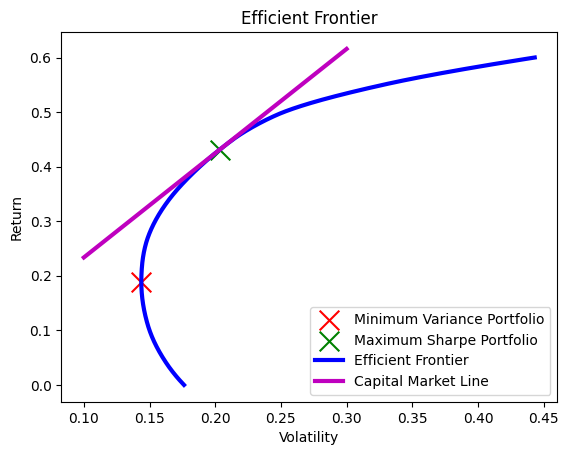

In [45]:
# Plotting the Efficient Frontier along with the Sharpe Gradient
plt.scatter(mv_volatility, mv_returns, c='r', marker='x', s=200) # Minimum Variance Portfolio
plt.scatter(ms_volatility, ms_returns, c='g', marker='x', s=200) # Maximum Sharpe Ratio Portfolio
plt.plot(ef_volatility, ef_returns, 'b', linewidth=3)
plt.plot(cml_x, cml_y, 'm', linewidth=3)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Plotting the Legend
plt.legend(['Minimum Variance Portfolio', 'Maximum Sharpe Portfolio', 'Efficient Frontier', 'Capital Market Line'])
plt.show()